# The orbit of the Large Magellanic Cloud in the presence of dynamical friction
## Test between Dynamigal and [Galpy](https://docs.galpy.org/en/v1.11.0/orbit.html#example-the-orbit-of-the-large-magellanic-cloud-in-the-presence-of-dynamical-friction)

In [1]:
using TestEnv
TestEnv.activate()

Precompiling project...
   8614.8 ms  ✓ Dynamigal
  1 dependency successfully precompiled in 10 seconds. 278 already precompiled.


"/tmp/jl_XxsXqI/Project.toml"

In [2]:
using Dynamigal
using Test
using PythonCall
using CairoMakie
using BenchmarkTools

In [3]:
# pyimport("sys")."path".append("")
# pyimport("sys")."path".append("../python")
# accelerations_py = pyimport("accelerations")
au = pyimport("astropy.units")
gp = pyimport("galpy.potential")
go = pyimport("galpy.orbit")
np = pyimport("numpy")

Python: <module 'numpy' from '/home/mmestre/.conda/envs/cosmos/lib/python3.11/site-packages/numpy/__init__.py'>

In [4]:
o = go.Orbit.from_name("LMC")
pot_g = gp.MWPotential2014

Python: [<galpy.potential.PowerSphericalPotentialwCutoff.PowerSphericalPotentialwCutoff object at 0x7f74ec312050>, <galpy.potential.MiyamotoNagaiPotential.MiyamotoNagaiPotential object at 0x7f74ec783490>, <galpy.potential.TwoPowerSphericalPotential.NFWPotential object at 0x7f74ed3de150>]

In [5]:
pot_g[2]._amp *= 1.5 # just once per session

Python: 7.278345800291998

In [6]:
@show (pot_g[2])._amp gp.MWPotential2014[2]._amp

(pot_g[2])._amp = <py 7.278345800291998>
(gp.MWPotential2014[2])._amp = <py 7.278345800291998>


Python: 7.278345800291998

In [7]:
ts= np.linspace(0.,-10.,1001)*au.Gyr
o.integrate(ts,pot_g)
t_g = pyconvert(Vector{Float64},o.time().value)
r_g = pyconvert(Vector{Float64},o.r(o.time()));


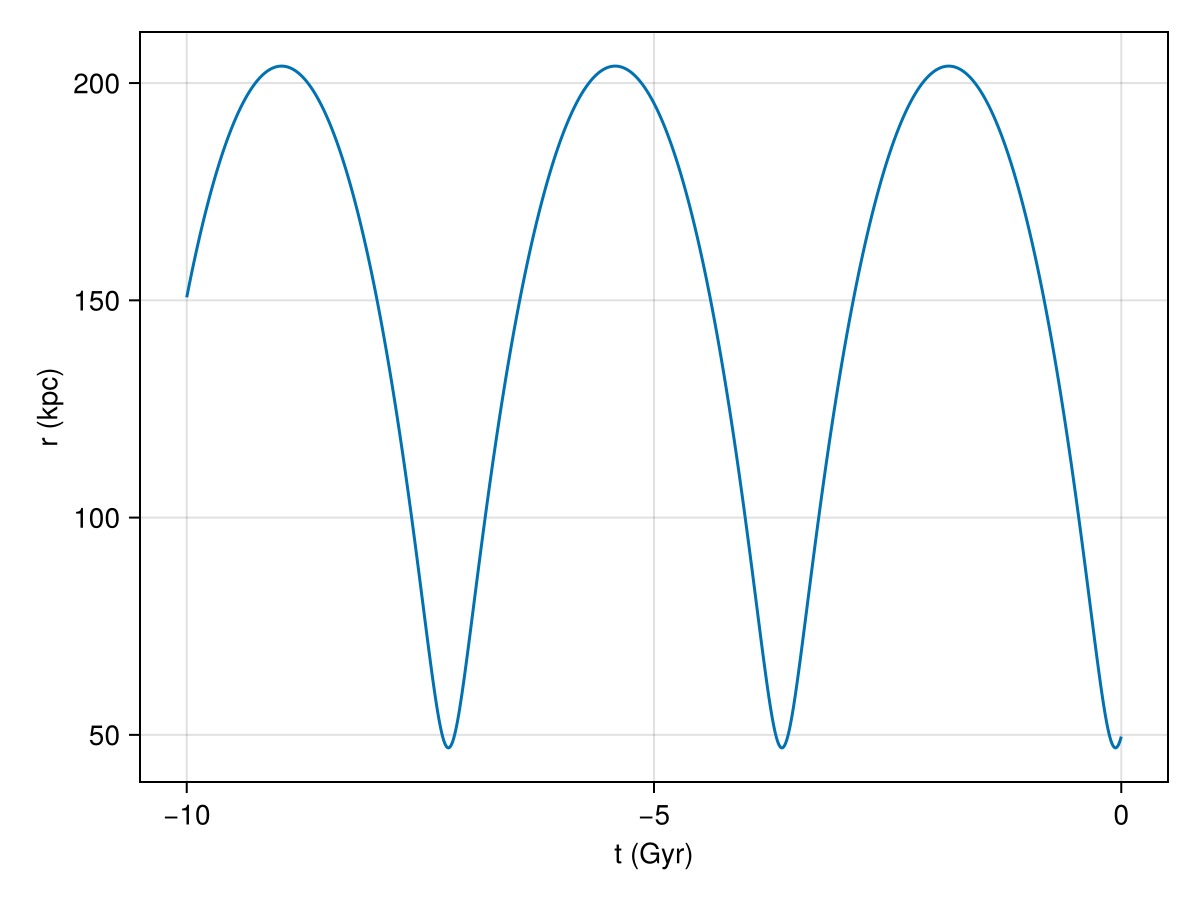

In [8]:
f = Figure()
ax = Axis(f[1,1], xlabel="t (Gyr)", ylabel="r (kpc)")
lines!(ax, t_g,r_g)
f

### Shalió igualito a tutorial de [Galpy](https://docs.galpy.org/en/v1.11.0/orbit.html#example-the-orbit-of-the-large-magellanic-cloud-in-the-presence-of-dynamical-friction)!!! 😺
porque es exactamente el código Galpy llamado desde Julia. Ahora veremos que pasa con Dynamigal ...

In [9]:
o = go.Orbit.from_name("LMC")
x_py = [o.x().value, o.y().value, o.z().value]
v_py = [o.vx().value, o.vy().value, o.vz().value]
_x = pyconvert(Vector{Float64},x_py)
_v = pyconvert(Vector{Float64},v_py)
o.integrate(ts,pot_g)
x₀ = SA[_x...]
v₀ = SA[adimensional(_v*𝕦.ν)...]
Δt = -0.01
t_range = (0.,-10.)
pot = MilkyWayBovy2014(1.5)
sol = evolve(pot, x₀, v₀, t_range, Tsit5(); options=ntSolverOptions(; reltol=5.0e-14, abstol=0.5e-14,saveat=Δt))
r = [sqrt( sol.x[1,i]^2+sol.x[2,i]^2+sol.x[3,i]^2) for i ∈ eachindex(sol.t)];


In [10]:
o.integrate(ts,pot_g)
t_g = pyconvert(Vector{Float64},o.time().value)
r_g = pyconvert(Vector{Float64},o.r(o.time()))
x_g = pyconvert(Vector{Float64},o.x(o.time()))
y_g = pyconvert(Vector{Float64},o.y(o.time()))
z_g = pyconvert(Vector{Float64},o.z(o.time()))
vx_g = pyconvert(Vector{Float64},o.vx(o.time()))
vy_g = pyconvert(Vector{Float64},o.vy(o.time()))
vz_g = pyconvert(Vector{Float64},o.vz(o.time()))
;

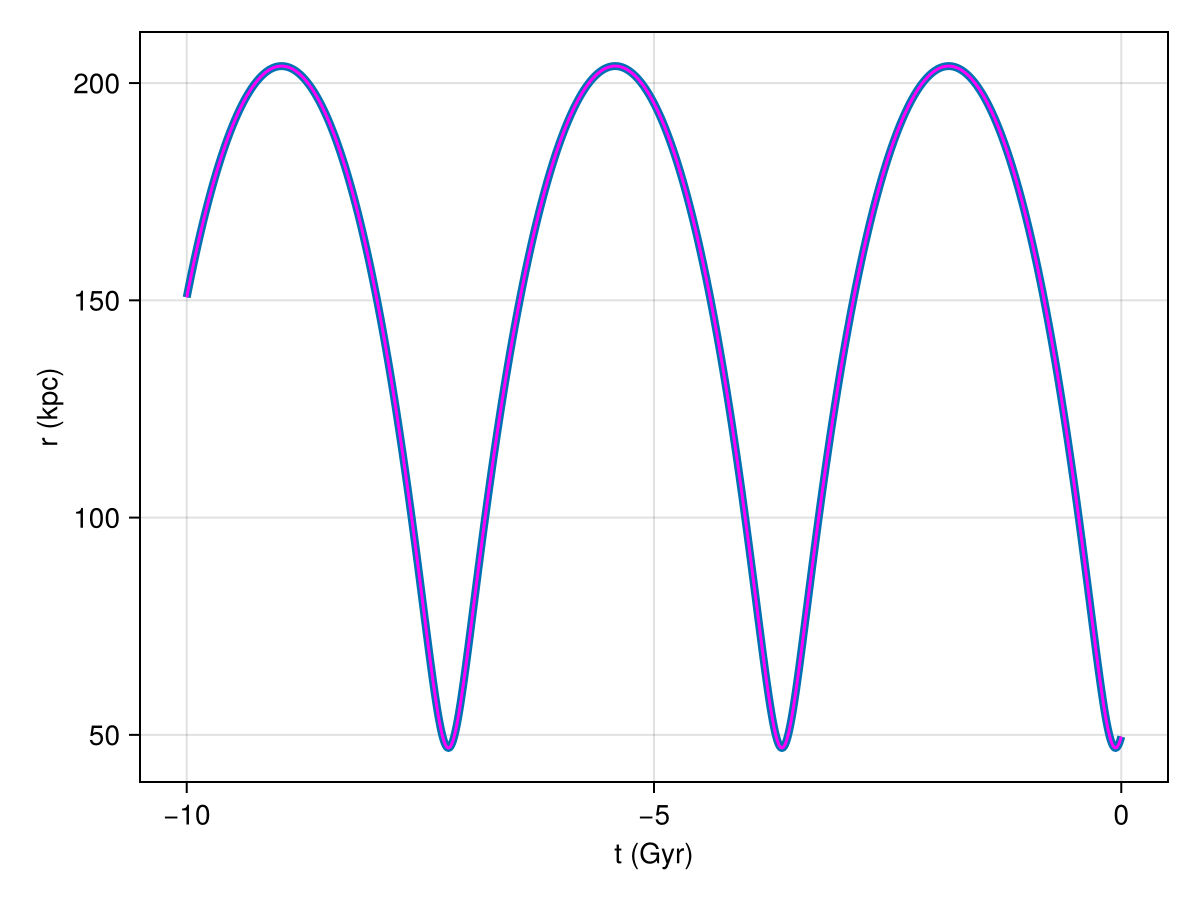

In [11]:
f = Figure()
ax = Axis(f[1,1], xlabel="t (Gyr)", ylabel="r (kpc)")
lines!(ax, t_g, r_g, linewidth=4)
lines!(ax, sol.t, r, color=:magenta)
f

### Ahora si a festejar: Dynamigal dio igual a [Galpy](https://docs.galpy.org/en/v1.11.0/orbit.html#example-the-orbit-of-the-large-magellanic-cloud-in-the-presence-of-dynamical-friction)
A continuación agregamos friccion dinamica en ambos casos.


In [12]:
cdf= gp.ChandrasekharDynamicalFrictionForce(GMs=5.0*10.0^10.0*au.Msun,rhm=5.0*au.kpc,
                                             dens=pot_g)

Python: <galpy.potential.ChandrasekharDynamicalFrictionForce.ChandrasekharDynamicalFrictionForce object at 0x7f74c81d8f10>

In [37]:
odf = o()
odf.integrate(ts,pot_g+cdf)
t_f_g = pyconvert(Vector{Float64},odf.time().value)
r_f_g = pyconvert(Vector{Float64},odf.r(odf.time()));

In [38]:
o = go.Orbit.from_name("LMC")
x_py = [o.x().value, o.y().value, o.z().value]
v_py = [o.vx().value, o.vy().value, o.vz().value]
_x = pyconvert(Vector{Float64},x_py)
_v = pyconvert(Vector{Float64},v_py)
o.integrate(ts,pot_g)
x₀ = SA[_x...]
v₀ = SA[adimensional(_v*𝕦.ν)...]
Δt = -0.01
t_range = (0.,-10.)
pot = MilkyWayBovy2014(1.5)
fric = ChandrasekharFriction(3.0, 5e10, 150.0)
sol = evolve(fric, pot, x₀, v₀, t_range, Vern7(); options=ntSolverOptions(; reltol=5.0e-14, abstol=0.5e-14,saveat=Δt))
r_f = [sqrt( sol.x[1,i]^2+sol.x[2,i]^2+sol.x[3,i]^2) for i ∈ eachindex(sol.t)];


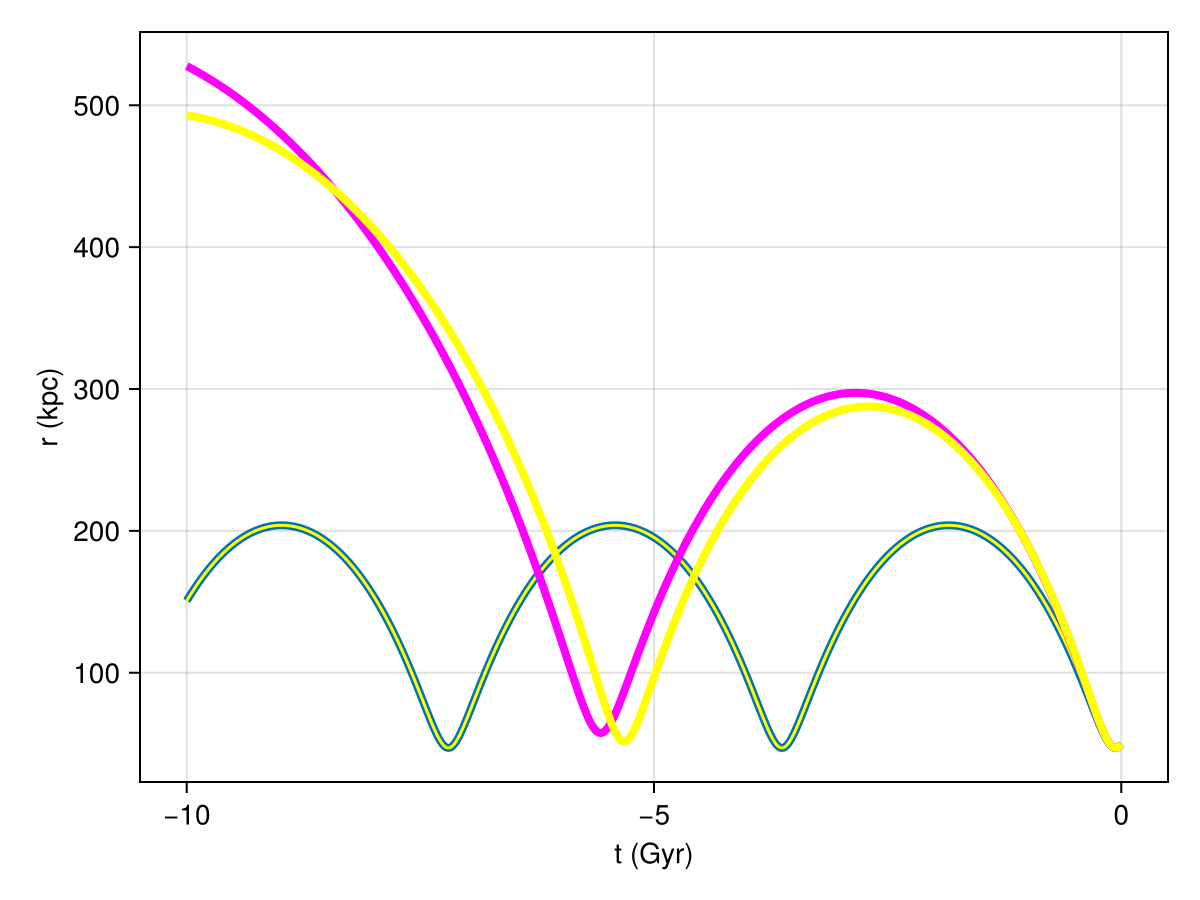

In [39]:
f = Figure()
ax = Axis(f[1,1], xlabel="t (Gyr)", ylabel="r (kpc)")
lines!(ax, t_g, r_g, linewidth=4)
lines!(ax, sol.t, r, color=:yellow)
lines!(ax, t_g, r_f_g, linewidth=4, color=:magenta)
lines!(ax, sol.t, r_f, linewidth=4, color=:yellow)
f

In [52]:
o = go.Orbit.from_name("LMC")
x_py = [o.x().value, o.y().value, o.z().value]
v_py = [o.vx().value, o.vy().value, o.vz().value]
_x = pyconvert(Vector{Float64},x_py)
_v = pyconvert(Vector{Float64},v_py)
o.integrate(ts,pot_g)
x₀ = SA[_x...]
v₀ = SA[adimensional(_v*𝕦.ν)...]
Δt = -0.01
t_range = (0.,-10.)
pot = MilkyWayBovy2014(1.5)
fric = GalpyFriction(4e10, 5.0, 50.0)
sol = evolve(fric, pot, x₀, v₀, t_range, Vern7(); options=ntSolverOptions(; reltol=5.0e-14, abstol=0.5e-14,saveat=Δt))
r_fg = [sqrt( sol.x[1,i]^2+sol.x[2,i]^2+sol.x[3,i]^2) for i ∈ eachindex(sol.t)];

In [70]:
o = go.Orbit.from_name("LMC")
x_py = [o.x().value, o.y().value, o.z().value]
v_py = [o.vx().value, o.vy().value, o.vz().value]
_x = pyconvert(Vector{Float64},x_py)
_v = pyconvert(Vector{Float64},v_py)
o.integrate(ts,pot_g)
x₀ = SA[_x...]
v₀ = SA[adimensional(_v*𝕦.ν)...]
Δt = -0.01
t_range = (0.,-10.)
pot = MilkyWayBovy2014(1.5)
fric = AgamaFriction(mₚ=7e10, σₕ=150.0)
sol = evolve(fric, pot, x₀, v₀, t_range, Vern7(); options=ntSolverOptions(; reltol=5.0e-14, abstol=0.5e-14,saveat=Δt))
r_fa = [sqrt( sol.x[1,i]^2+sol.x[2,i]^2+sol.x[3,i]^2) for i ∈ eachindex(sol.t)];

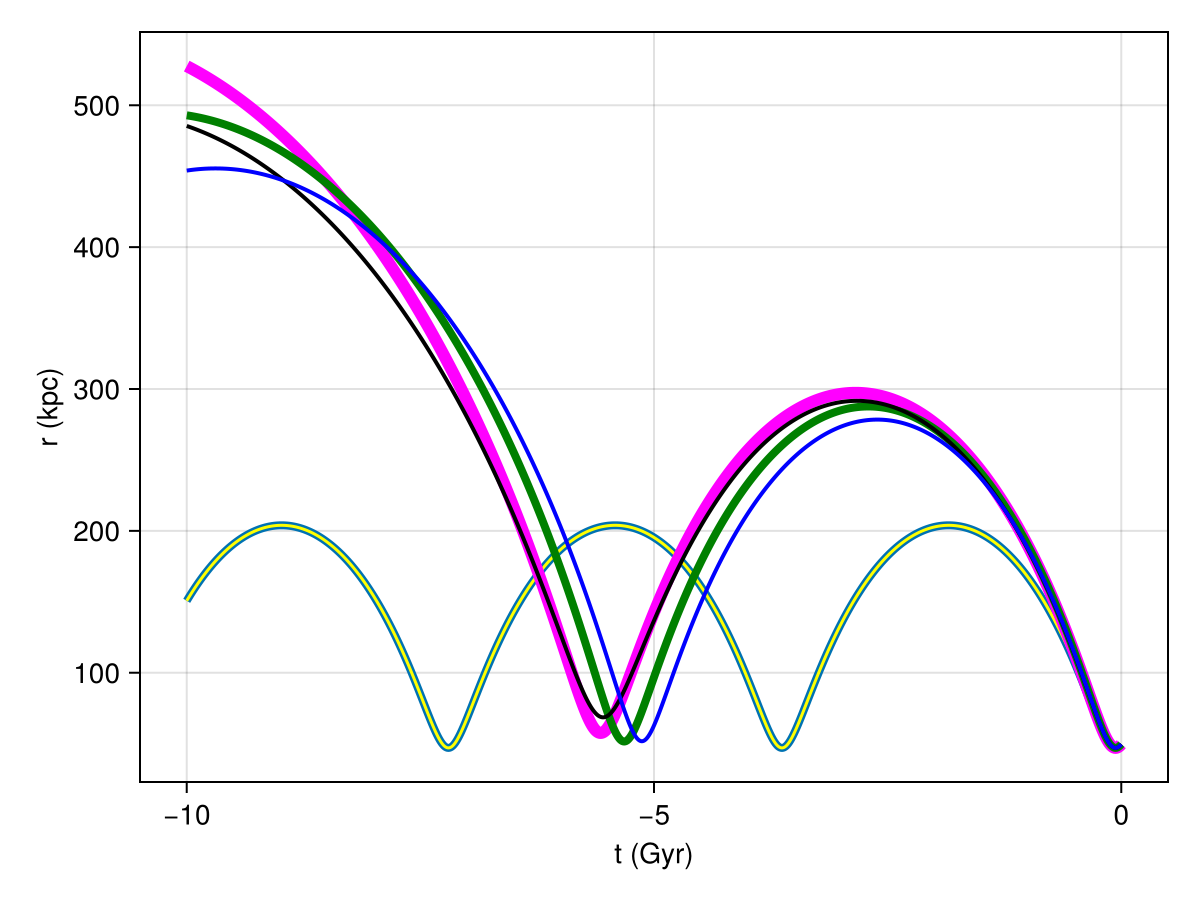

In [71]:
f = Figure()
ax = Axis(f[1,1], xlabel="t (Gyr)", ylabel="r (kpc)")
lines!(ax, t_g, r_g, linewidth=4)
lines!(ax, sol.t, r, color=:yellow)
lines!(ax, t_g, r_f_g, linewidth=6, color=:magenta)
lines!(ax, sol.t, r_f, linewidth=4, color=:green)
lines!(ax, sol.t, r_fg, linewidth=2, color=:black)
lines!(ax, sol.t, r_fa, linewidth=2, color=:blue)
f